<a href="https://colab.research.google.com/github/xrotre05/MLF/blob/main/LAB_08/Copy_of_Ex_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

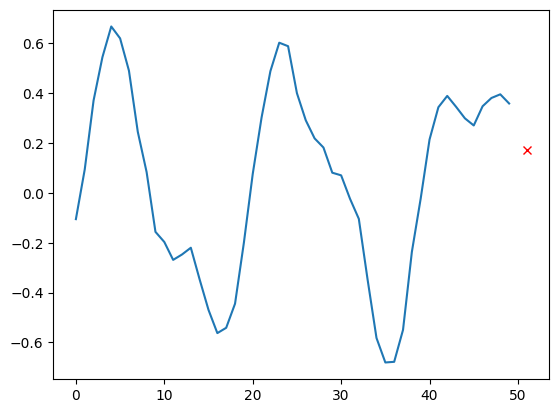

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [9]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [12]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [14]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 6s 17ms/step - loss: 0.3539 - mean_squared_error: 0.3539 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 5/5
219/219 [==============================] - 2s 8ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0148 - val_mean_squared_error: 0.0148


In [16]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

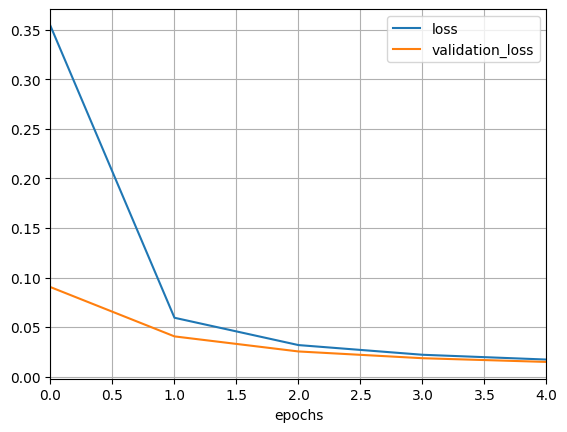

In [17]:
plot_function(history_linear)

In [18]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.014490010216832161
Test MSE:  0.014490010216832161


### 1.5 Simple RNN Model

In [19]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [20]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [21]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 16s 64ms/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 2/5
219/219 [==============================] - 11s 52ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 3/5
219/219 [==============================] - 13s 57ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 4/5
219/219 [==============================] - 12s 57ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 5/5
219/219 [==============================] - 10s 46ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0119 - val_mean_squared_error: 0.0119


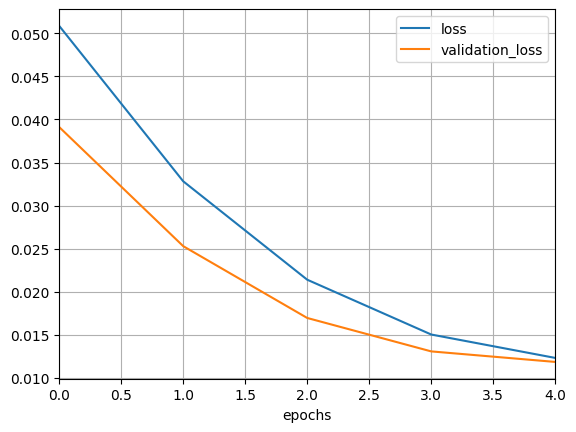

In [22]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [23]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [28]:
learning_rate_deep_rnn = 0.05
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [29]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 44s 188ms/step - loss: 0.1580 - mean_squared_error: 0.1580 - val_loss: 0.0588 - val_mean_squared_error: 0.0588
Epoch 2/5
219/219 [==============================] - 40s 183ms/step - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 3/5
219/219 [==============================] - 42s 193ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 4/5
219/219 [==============================] - 40s 184ms/step - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 5/5
219/219 [==============================] - 42s 190ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0211 - val_mean_squared_error: 0.0211


In [30]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.020915202796459198
Test MSE:  0.020915202796459198


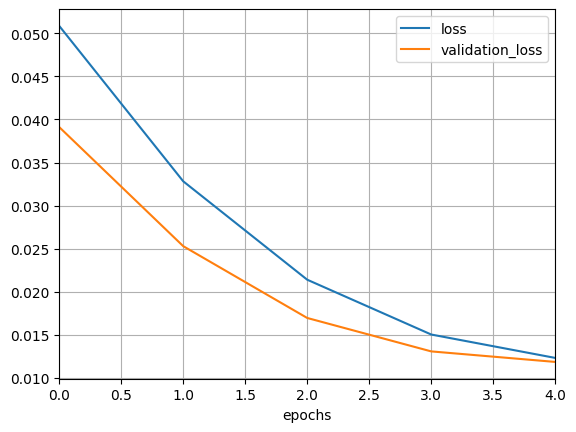

In [31]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [13]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


### 2.2 - Dataset examination

In [33]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 [==============================] - 0s 0us/step


In [34]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [35]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [157]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [158]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(256, return_sequences=True),
    keras.layers.GRU(256),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [159]:
optimizer = Adam(learning_rate = 0.001)

In [160]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [161]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 61s 89ms/step - loss: 0.6934 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 2/5
625/625 [==============================] - 24s 39ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 3/5
625/625 [==============================] - 22s 35ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 4/5
625/625 [==============================] - 24s 38ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 5/5
625/625 [==============================] - 21s 34ms/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5062


In [162]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6931514143943787
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LSTM and GRU. Compare the results

simple RNN:\
Test loss: 0.6951086521148682\
Test accuracy:  50.0 %


simple LSTM:
when I replaced simple RNN with LSTM this were the results:\
Test loss: 0.5828507542610168\
Test accuracy:  71.53199911117554 %

simple GRU:\
when I replaced simple RNN with GRU this were the results:\
Test loss: 0.3747035562992096\
Test accuracy:  83.28800201416016 %

All other changes resulted in less accuracz the in simple GRU